In [48]:
!python -m pip install newsapi-python

In [49]:
! python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\rzhao\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rzhao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rzhao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rzhao\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\rzhao\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\rzhao\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [50]:
import pandas as pd
import requests
import json
import csv
import spacy
import nltk
from nltk import pos_tag, word_tokenize
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from collections import Counter
from nltk.tag import pos_tag
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')
language_model = spacy.load("en_core_web_sm")

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\rzhao\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rzhao\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [51]:
#09 - 09/25-09/30
#10A - 10/1-10/15
#10B = 10/16-10/26
#10C - 10/27 - 10/30
#11A - 10/31-11/3
#11B - 11/3-11/5

In [52]:
pd.set_option('display.max_rows', 10) 

In [53]:
import datetime as dt
from newsapi import NewsApiClient

api = "712eca8acb6a4489a4bb1794b2cf3971"

api = NewsApiClient(api_key=api)

mydata = api.get_everything(
    q="Vance",
    from_param="2024-12-01",
    to="2024-12-14",
    language="en",
)
mydata

{'status': 'ok',
 'totalResults': 1066,
 'articles': [{'source': {'id': None, 'name': '[Removed]'},
   'author': None,
   'title': '[Removed]',
   'description': '[Removed]',
   'url': 'https://removed.com',
   'urlToImage': None,
   'publishedAt': '2024-12-03T13:00:42Z',
   'content': '[Removed]'},
  {'source': {'id': 'abc-news', 'name': 'ABC News'},
   'author': 'Tal Axelrod',
   'title': "Early appointments offer Vance chance to throw weight around as Trump's heir apparent",
   'description': 'Donald Trump has been the ultimate GOP mover and shaker since 2015. Now, Vice President-elect JD Vance has some early opportunities to make his own mark.',
   'url': 'https://abcnews.go.com/Politics/early-appointments-offer-vance-chance-throw-weight-trumps/story?id=116541208',
   'urlToImage': 'https://i.abcnewsfe.com/a/167721ac-e17c-4ee1-8f61-b785e3d5037e/vance-gty-jt-241206_1733515548016_hpMain_16x9.jpg?w=1600',
   'publishedAt': '2024-12-07T10:21:58Z',
   'content': 'President-elect Donald 

In [54]:
df = pd.json_normalize(mydata['articles'])
df

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,None,[Removed],[Removed],https://removed.com,None,2024-12-03T13:00:42Z,[Removed],None,[Removed]
1,Tal Axelrod,Early appointments offer Vance chance to throw...,Donald Trump has been the ultimate GOP mover a...,https://abcnews.go.com/Politics/early-appointm...,https://i.abcnewsfe.com/a/167721ac-e17c-4ee1-8...,2024-12-07T10:21:58Z,President-elect Donald Trump has been the ulti...,abc-news,ABC News
2,Bryan Metzger,"Even if Trump tried to raise the minimum wage,...",Trump recently signaled openness to raising th...,https://www.businessinsider.com/trump-minimum-...,https://i.insider.com/67579eef91c1cc343d47902c...,2024-12-11T15:47:47Z,Trump recently signaled openness to raising th...,business-insider,Business Insider
3,EditorDavid,Dozens of Countries Hit in Chinese Telecom Hac...,China-linked spies may still be lurking in U.S...,https://yro.slashdot.org/story/24/12/08/012421...,https://a.fsdn.com/sd/topics/china_64.png,2024-12-08T08:34:00Z,"Speaking during a press briefing Wednesday, An...",None,Slashdot.org
4,Matt Novak,Computer Programmer Named ‘Person of Interest’...,Social media profiles for Luigi Mangione inclu...,https://gizmodo.com/computer-programmer-named-...,https://gizmodo.com/app/uploads/2024/12/luigi-...,2024-12-09T20:30:05Z,A 26-year-old man identified as Luigi Mangione...,None,Gizmodo.com
...,...,...,...,...,...,...,...,...,...
95,Matthew Chapman,Ex-prosecutor flags Trump's 'frightening' mess...,President-elect Donald Trump is sending a clea...,https://www.rawstory.com/trump-joyce-vance/,https://www.rawstory.com/media-library/republi...,2024-12-10T00:51:56Z,President-elect Donald Trump is sending a clea...,None,Raw Story
96,bringatrailer,2010 Harley-Davidson XR1200 at No Reserve,This 2010 Harley-Davidson XR1200 is powered by...,https://bringatrailer.com/listing/2010-harley-...,https://bringatrailer.com/wp-content/uploads/2...,2024-12-07T21:15:11Z,This 2010 Harley-Davidson XR1200 is powered by...,None,Bringatrailer.com
97,bringatrailer,1994 Harley-Davidson Dyna Wide Glide Project a...,This 1994 Harley-Davidson Dyna Wide Glide was ...,https://bringatrailer.com/listing/1994-harley-...,https://bringatrailer.com/wp-content/uploads/2...,2024-12-13T23:40:10Z,This 1994 Harley-Davidson Dyna Wide Glide was ...,None,Bringatrailer.com
98,Ewan Palmer,Alvin Bragg Filing Hints Trump Can Be Sentence...,"Joyce Vance said Bragg made a ""persuasive"" arg...",https://www.newsweek.com/alvin-bragg-donald-tr...,https://d.newsweek.com/en/full/2541354/alvin-b...,2024-12-11T14:18:12Z,Manhattan District Attorney Alvin Bragg has in...,newsweek,Newsweek


In [102]:
kamala = pd.read_csv("kamala.csv", index_col=0)
kamala.head()

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,Dell Cameron,As FTC Chair Lin...,New polling show...,https://www.wire...,https://media.wi...,2024-09-27T11:30...,"For months, spec...",wired,Wired
1,NaN,Kamala Harris go...,In her first vis...,https://www.bbc....,https://ichef.bb...,2024-09-28T02:50...,US Vice-Presiden...,NaN,BBC News
2,Bryan Metzger,Kamala Harris' m...,Harris has long ...,https://www.busi...,https://i.inside...,2024-09-27T09:30...,With Trump signa...,business-insider,Business Insider
3,Bryan Metzger,Kamala Harris si...,Kamala Harris ha...,https://www.busi...,https://i.inside...,2024-09-30T16:40...,Vice President K...,business-insider,Business Insider
4,John L. Dorman,Harris' border v...,Kamala Harris is...,https://www.busi...,https://i.inside...,2024-09-28T20:51...,Vice President K...,business-insider,Business Insider


In [103]:
kamala[kamala['title'].str.contains("Removed")]

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
103,NaN,[Removed],[Removed],https://removed.com,NaN,2024-10-23T10:00...,[Removed],NaN,[Removed]


In [57]:
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


c:\Users\rzhao\anaconda3\envs\is310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [104]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

def classify(text):
    try:
        return pipe(text)[0]['label']
    except Exception as e:
        return None

In [105]:
def prep_data(csv):
    df = pd.read_csv(csv, index_col=0)
    df['Title'] = df['title'].apply(clean).apply(lemmatize)
    df['Title Sentiment'] = df['Title'].apply(classify)
    df = df[['Title' , 'Title Sentiment']]
    return df

In [129]:
kamala = prep_data('kamala.csv')
trump = prep_data('trump.csv')
walz = prep_data('walz.csv')
vance = prep_data('vance.csv')

In [130]:
kamala[kamala['Title'].str.contains("Removed")]

,Title,Title Sentiment


In [62]:
kamala_sentiments = np.array((kamala['Title Sentiment'].value_counts()/len(kamala) * 100).round(2))
walz_sentiments = np.array((walz['Title Sentiment'].value_counts()/len(walz) * 100).round(2))
trump_sentiments = np.array((trump['Title Sentiment'].value_counts()/len(trump) * 100).round(2))
vance_sentiments = np.array((vance['Title Sentiment'].value_counts()/len(vance) * 100).round(2))

In [63]:
print(kamala_sentiments, walz_sentiments, trump_sentiments,vance_sentiments)

[75.61 21.93  2.46] [71.43 22.6   5.97] [69.57 28.36  2.07] [68.3  28.37  3.33]


In [64]:
neu = np.array([kamala_sentiments[0], walz_sentiments[0], trump_sentiments[0], vance_sentiments[0]])
neg = np.array([kamala_sentiments[1], walz_sentiments[1], trump_sentiments[1], vance_sentiments[1]])
pos = np.array([kamala_sentiments[2], walz_sentiments[2], trump_sentiments[2], vance_sentiments[2]])

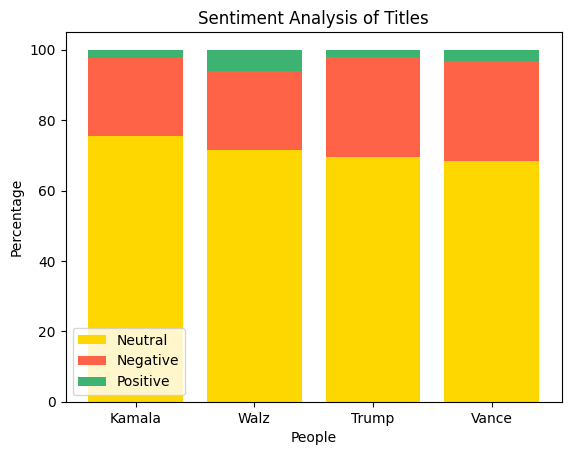

In [65]:
people = ['Kamala', 'Walz', 'Trump', 'Vance']
plt.bar(people, neu, color='gold')
plt.bar(people, neg, bottom=neu, color='tomato')
plt.bar(people, pos, bottom=neu+neg, color='mediumseagreen')
plt.xlabel("People")
plt.ylabel("Percentage")
plt.legend(["Neutral", "Negative", "Positive"])
plt.title("Sentiment Analysis of Titles")
plt.show()

In [66]:
def subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

In [67]:
kamala['Subjectivity'] = kamala['Title'].apply(subjectivity)
walz['Subjectivity'] = walz['Title'].apply(subjectivity)
trump['Subjectivity'] = trump['Title'].apply(subjectivity)
vance['Subjectivity'] = vance['Title'].apply(subjectivity)

In [132]:
def get_verbs(text):
    blob = TextBlob(text)
    tags = pos_tag(blob.words, tagset='universal')
    return [ word for (word,tag) in tags if tag == "VERB"]

In [133]:
def get_adjectives(text):
    blob = TextBlob(text)
    tags = pos_tag(blob.words, tagset='universal')
    return [ word for (word,tag) in tags if tag == "ADJ"]

In [134]:
def add_tags(df):
    df['Verbs'] = df['Title'].apply(get_verbs)
    df['Adjectives'] = df['Title'].apply(get_adjectives)

In [135]:
add_tags(kamala)
add_tags(walz)
add_tags(trump)
add_tags(vance)

In [73]:
kwords = []
wwords = []
twords = []
vwords = []

def words(df, list):
    for word in df['Verbs']:
        list.extend(word)
    for word in df['Adjectives']:
        list.extend(word)

In [74]:
words(kamala,kwords)
words(walz,wwords)
words(trump,twords)
words(vance,vwords)

In [75]:
def histogram(words, name):
    vectorizer = CountVectorizer()
    bag_of_words = vectorizer.fit_transform(words)
    bag_of_words
    bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
    
    word_counts = bow_df.sum()
    word_counts = word_counts.sort_values(ascending=False)

    plot_list = word_counts.head(20)
    plt.figure(figsize=(10,5))
    plt.bar(plot_list.index, plot_list.values)
    plt.xticks(rotation=45)
    plt.title(name + " Top 20 Most Common Verbs and Adjectives")
    plt.show()

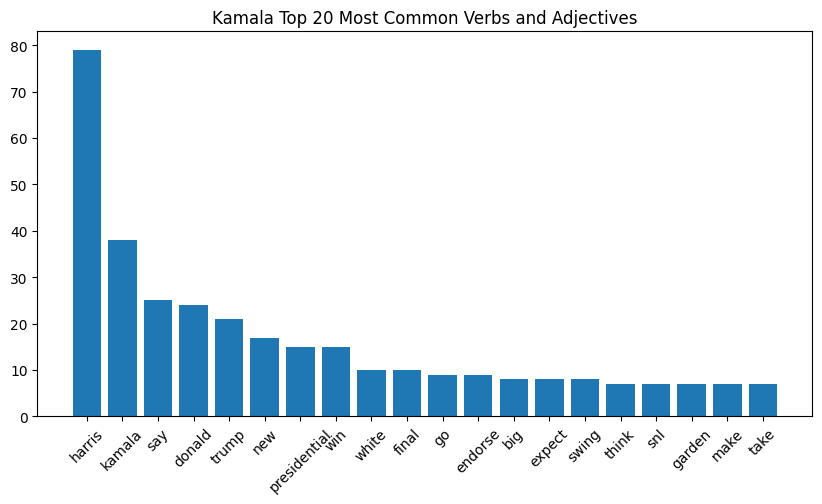

In [76]:
histogram(kwords, "Kamala")

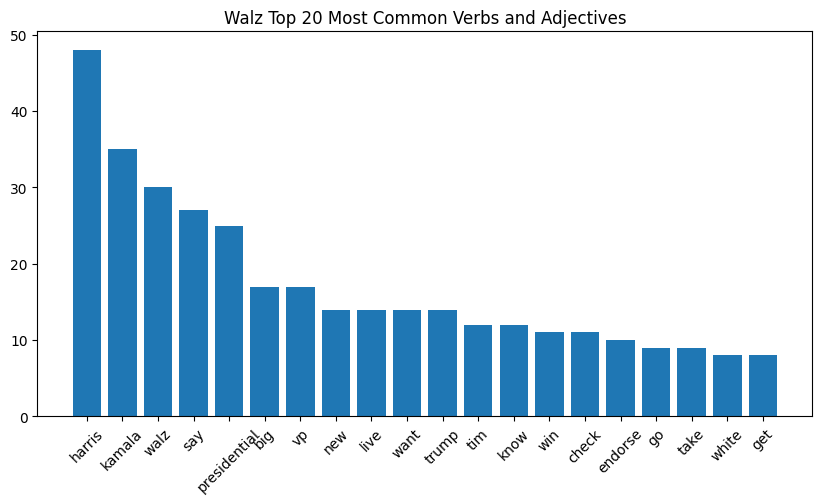

In [77]:
histogram(wwords, "Walz")

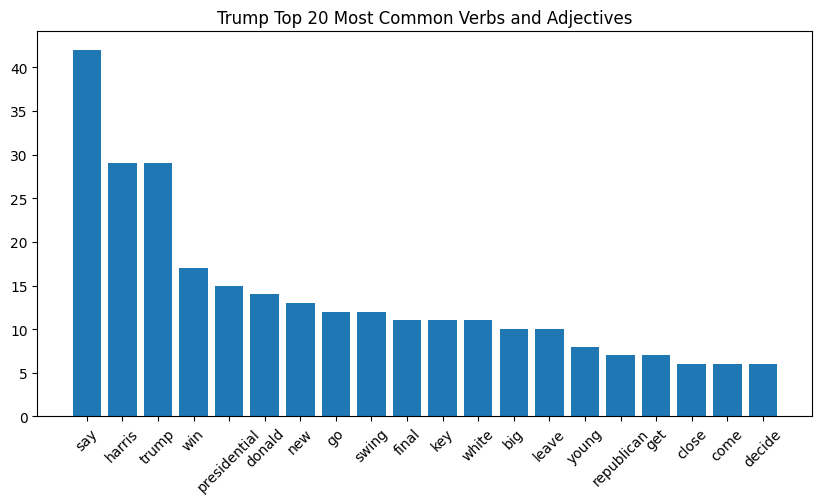

In [78]:
histogram(twords, "Trump")

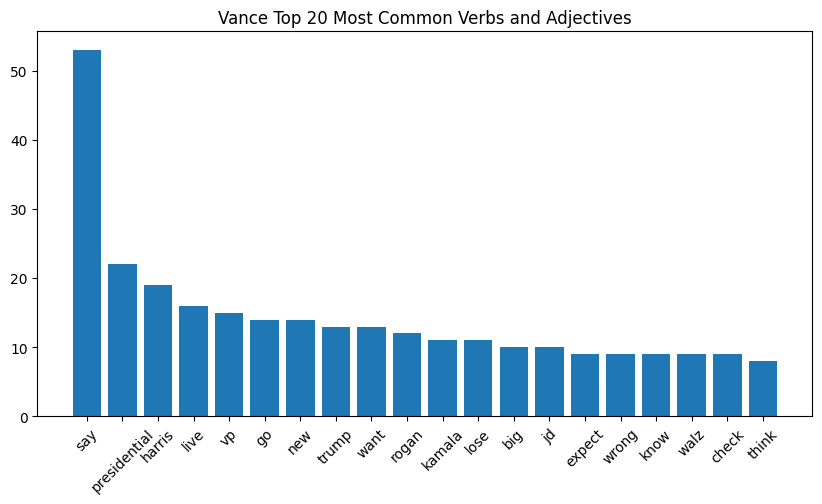

In [79]:
histogram(vwords, "Vance")

In [80]:
ksub = []
wsub = []
tsub = []
vsub = []

In [82]:
def subjective_words(words, dest):
    for word in words:
        word = TextBlob(word)
        if word.subjectivity >= 0.5:
            dest.append(word.string)


In [83]:
kwords

['expire',
 'tear',
 'go',
 'think',
 'harris',
 'say',
 'say',
 'stalled',
 'bring',
 'distance',
 'motorcade',
 'confused',
 'hundred',
 'remain',
 'leave',
 'hezbollahs',
 'tell',
 'turn',
 'run',
 'vote',
 'kamala',
 'say',
 'ruft',
 'reed',
 'push',
 'trump',
 'israel',
 'know',
 'fed',
 'say',
 'take',
 'swing',
 'say',
 'live',
 'make',
 'cold',
 'reed',
 'harris',
 'boeing',
 'say',
 'go',
 'leave',
 'turn',
 'geistig',
 'escalate',
 'ou',
 'take',
 'cbs',
 'compare',
 'kamala',
 'expect',
 'geistig',
 'return',
 'harris',
 'make',
 'republicans',
 'condemn',
 'win',
 'springfield',
 'say',
 'want',
 'worry',
 'harris',
 'awaken',
 'turn',
 'find',
 'kamala',
 'ruft',
 'appearance',
 'roan',
 'give',
 'les',
 'républicain',
 'headline',
 'show',
 'buy',
 'harris',
 'know',
 'read',
 'say',
 'kamala',
 'remove',
 'kamala',
 'swing',
 'fake',
 'walz',
 'harris',
 'say',
 'steve',
 'care',
 'stop',
 'kamala',
 'withhold',
 'win',
 'revealing',
 'stop',
 'make',
 'win',
 'take',
 '

In [84]:
subjective_words(kwords, ksub)
subjective_words(wwords, wsub)
subjective_words(twords, tsub)
subjective_words(vwords, vsub)

In [85]:
Counter(ksub).most_common(10)

[('final', 10),
 ('key', 7),
 ('open', 7),
 ('live', 6),
 ('bad', 5),
 ('fake', 4),
 ('late', 4),
 ('critical', 4),
 ('mean', 4),
 ('cold', 3)]

In [86]:
Counter(wsub).most_common(10)

[('live', 14),
 ('open', 7),
 ('cold', 6),
 ('fake', 6),
 ('wrong', 6),
 ('bad', 6),
 ('final', 6),
 ('key', 4),
 ('good', 4),
 ('important', 4)]

In [87]:
Counter(tsub).most_common(10)

[('key', 11),
 ('final', 11),
 ('bad', 6),
 ('late', 5),
 ('violent', 4),
 ('elect', 3),
 ('super', 3),
 ('different', 3),
 ('live', 2),
 ('guilty', 2)]

In [88]:
Counter(vsub).most_common(10)

[('live', 16),
 ('wrong', 9),
 ('late', 6),
 ('normal', 6),
 ('open', 5),
 ('good', 5),
 ('cold', 4),
 ('weird', 4),
 ('love', 4),
 ('bad', 4)]

In [89]:
def plot(data, name):
    labels, values = zip(*Counter(data).most_common(10))

    indexes = np.arange(len(labels))
    width = 1
    plt.figure(figsize=(10,5))
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.01, labels)
    plt.xticks(rotation=45)
    plt.title(name + " Top 10 Most Common Subjective Words")
    plt.show()

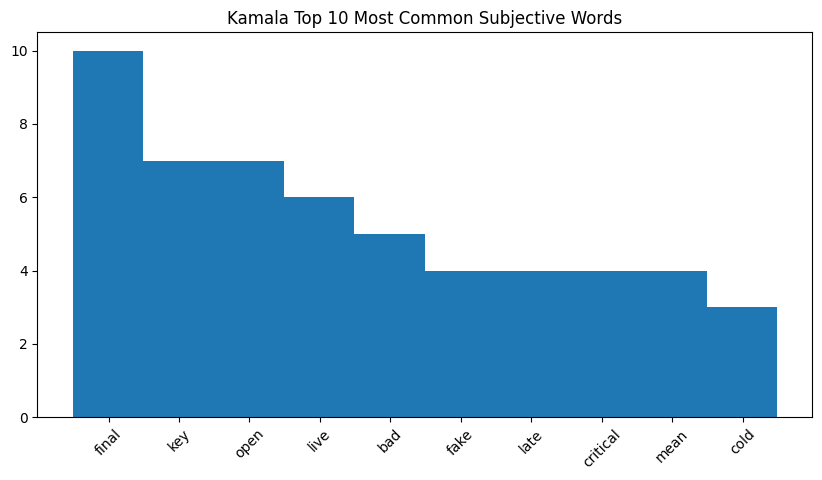

In [90]:
plot(ksub, "Kamala")

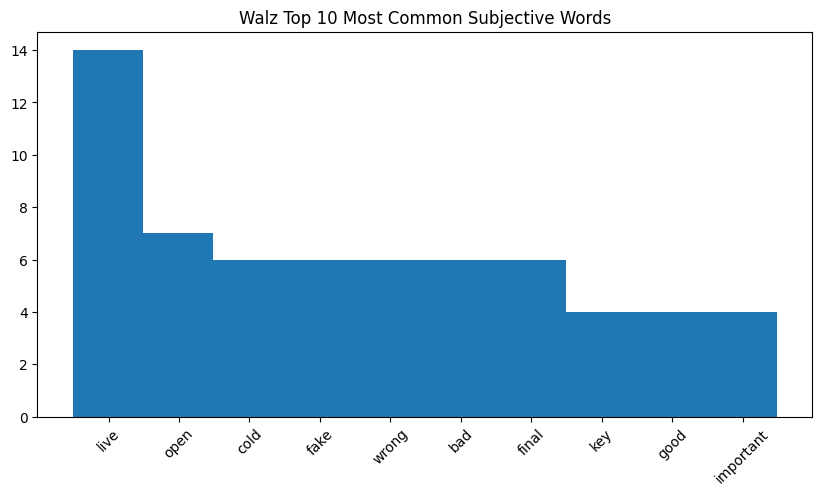

In [91]:
plot(wsub, "Walz")

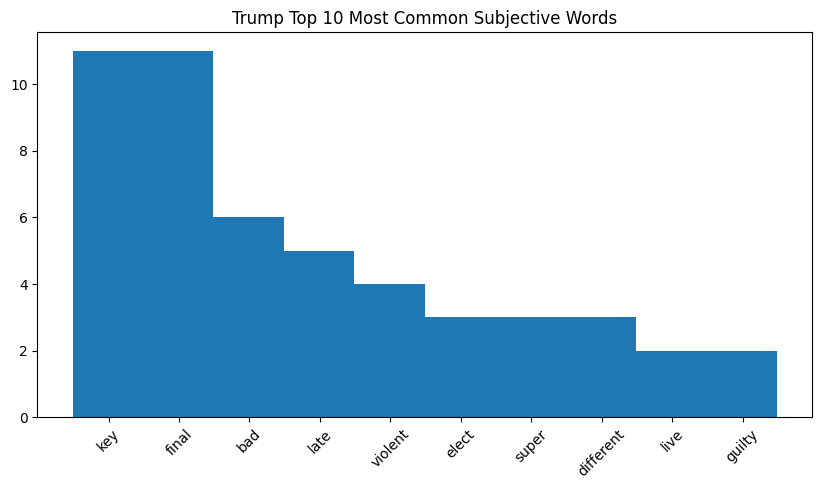

In [92]:
plot(tsub, "Trump")

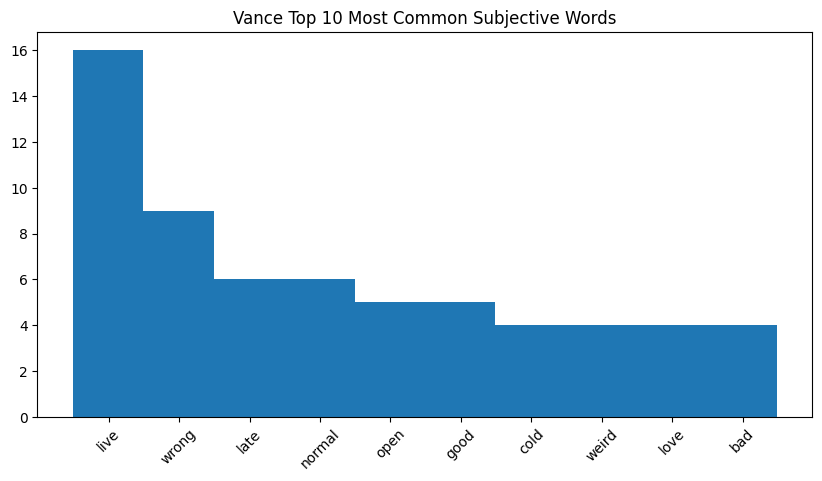

In [93]:
plot(vsub, "Vance")

In [94]:
print(len(kamala), len(trump), len(walz), len(vance))

488 483 553 571
